
## Laboratorium 1


### Opis

Celem laboratorium jest instalacja środowiska programistycznego oraz zapoznanie się z podstawowymi bibliotekami do przetwarzania danych w języku Python.


#### Zadanie 1

Wczytaj dane z pliku `dane.npz`. Plik ten zawiera zbiór danych zawierający **WYDATKI BUDŻETÓW WOJEWÓDZTW**.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
import numpy as np
with open('./dataset/dane.npz', 'rb') as f:
    content = np.load(f)
    columns, data = content['columns'].tolist(), content['data'].tolist()
```

In [2]:
import numpy as np
with open('./dataset/dane.npz', 'rb') as f:
    content = np.load(f)
    columns, data = content['columns'].tolist(), content['data'].tolist()

#### Zadanie 2

Zapoznaj się z zawartością zmiennych `columns` oraz `data`.


In [1]:
#data

#### Zadanie 3

Wyświetl tylko dane z roku 2008.


In [4]:
l = [row for row in data if row[3] == '2008' and row[1] != 'POLSKA']
l

# l = []
# for line in data:
#   if line[3] == '2008':
#       l.append(line)


# l = filter(lambda row: row[3] == '2008' and row[1] != 'POLSKA', data)
# l

# data_np = np.array(data)
# data_np[data_np[:, 3] == '2008'].tolist()

# import pandas as pd
# data_pd = pd.DataFrame(data)
# data_pd[data_pd[3] == '2008'].values.tolist()

[['200000', 'DOLNOŚLĄSKIE', 'ogółem', '2008', '1006184128.91', 'zł'],
 ['400000', 'KUJAWSKO-POMORSKIE', 'ogółem', '2008', '640715844.5', 'zł'],
 ['600000', 'LUBELSKIE', 'ogółem', '2008', '698605287.8', 'zł'],
 ['800000', 'LUBUSKIE', 'ogółem', '2008', '340059853.25', 'zł'],
 ['1000000', 'ŁÓDZKIE', 'ogółem', '2008', '664259917.26', 'zł'],
 ['1200000', 'MAŁOPOLSKIE', 'ogółem', '2008', '923339420.95', 'zł'],
 ['1400000', 'MAZOWIECKIE', 'ogółem', '2008', '3079249722.19', 'zł'],
 ['1600000', 'OPOLSKIE', 'ogółem', '2008', '371920722.19', 'zł'],
 ['1800000', 'PODKARPACKIE', 'ogółem', '2008', '646018737.58', 'zł'],
 ['2000000', 'PODLASKIE', 'ogółem', '2008', '334514182.9', 'zł'],
 ['2200000', 'POMORSKIE', 'ogółem', '2008', '712235165.04', 'zł'],
 ['2400000', 'ŚLĄSKIE', 'ogółem', '2008', '1263238190.05', 'zł'],
 ['2600000', 'ŚWIĘTOKRZYSKIE', 'ogółem', '2008', '374074677.24', 'zł'],
 ['2800000', 'WARMIŃSKO-MAZURSKIE', 'ogółem', '2008', '449534924.36', 'zł'],
 ['3000000', 'WIELKOPOLSKIE', 'ogółem'

#### Zadanie 4

Wyświetl wykres uwzględniając 10 województw (bez sumarycznego dla całego kraju), w których wydatki budżetów były największe w roku 2008.

> Podpowiedź: Możesz w tym celu wykorzystać moduł matplotlib.pyplot. Przykład:
```python
import matplotlib.pyplot as plt
plt.bar([1, 2, 3], [5, 2, 4])
```

> Podpowiedź 2: Sprawdź inne funkcje aby utworzyć tytuł wykresu, oznaczyć osie, wyświetlić legendę i zmienić kolory słupków. https://matplotlib.org/stable/tutorials/introductory/pyplot.html

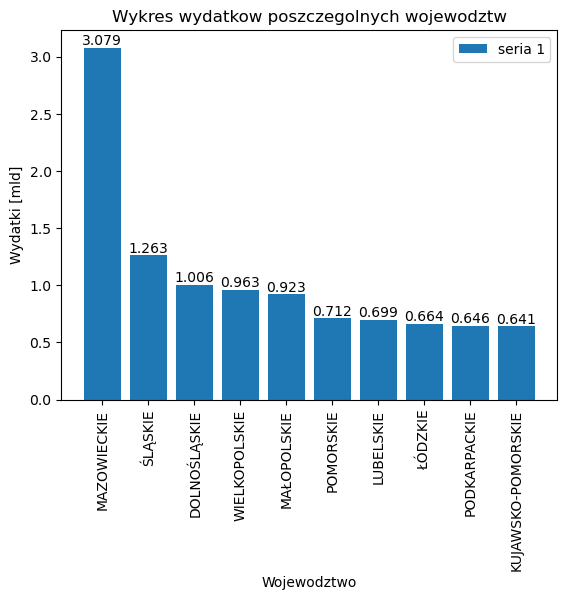

In [5]:
import matplotlib.pyplot as plt
#l2 = [row[:4] + [float(row[4])] + row[5:] for row in l]
#l2

l2 = map(lambda row: row[:4] + [float(row[4])] + row[5:], l)

l3 = sorted(l2, key=lambda row: row[4], reverse=True)
l4 = l3[:10]

woj = [row[1] for row in l4]
money = [row[4]/1000000000 for row in l4]
plt.bar(woj, money, label='seria 1') 
plt.title('Wykres wydatkow poszczegolnych wojewodztw')
plt.ylabel('Wydatki [mld]')
plt.xlabel('Wojewodztwo')
plt.legend()
plt.xticks(rotation=90)
for i in range(len(woj)):
    plt.text(i, money[i] + 0.025, str(round(money[i], 3)), ha='center')

#### Zadanie 5

Wczytaj dane z pliku `dane-ludnosc.npz`. Plik ten zawiera zbiór danych zawierający **liczbę ludnosci**.

Oblicz wydatki z budżetu na mieszkańca dla każdego z województw (_uwzględnij dane z roku 2008_).


In [6]:
import pandas as pd
with open('./dataset/dane-ludnosc.npz', 'rb') as f:
    content2 = np.load(f)
    columns2, data2 = content2['columns'].tolist(), content2['data'].tolist()

l_2 = [row for row in data2 if row[4] == '2008' and row[1] != 'POLSKA']

#Wydatki/liczbe osob
wydatki_osoba = list(map(lambda row: row[1:2] + [int(row[5])], l_2))
for row, divide in zip(wydatki_osoba, l):
    row[1] = float(divide[4]) / row[1]

wydatki_osoba = pd.DataFrame(wydatki_osoba, columns=['Wojewodztwo', 'Wydatki na mieszkanca'])
wydatki_osoba


,Wojewodztwo,Wydatki na mieszkanca
0,DOLNOŚLĄSKIE,349.726623
1,KUJAWSKO-POMORSKIE,309.836195
2,LUBELSKIE,323.154291
3,LUBUSKIE,337.039307
4,ŁÓDZKIE,260.610491
5,MAŁOPOLSKIE,280.894804
6,MAZOWIECKIE,591.651970
7,OPOLSKIE,360.025480
8,PODKARPACKIE,307.701965
9,PODLASKIE,280.757537


#### Zadanie 6

Które województwo odnotowało największy (oraz najmniejszy) wzrost wydatków z budżetu na mieszkańca pomiędzy latami 2002 a 2020?

Oblicz jako współczynnik wydatków z budżetu na mieszkańca z roku 2020 do roku 2002.

$$
wspolczynnik = \frac{w_{2020}}{w_{2002}}
$$

gdzie $w_{2020}$ to wydatki z budżetu na mieszkańca w roku 2020, a $w_{2002}$ to wydatki z budżetu na mieszkańca w roku 2002.


In [7]:
l_2002 = [row for row in data2 if row[4] == '2002' and row[1] != 'POLSKA']
l_2020 = [row for row in data2 if row[4] == '2020' and row[1] != 'POLSKA']
l_2002_koszty = [row for row in data if row[3] == '2002' and row[1] != 'POLSKA']
l_2020_koszty = [row for row in data if row[3] == '2020' and row[1] != 'POLSKA']

wydatki_osoba_2002 = list(map(lambda row: row[1:2] + [int(row[5])], l_2002))
wydatki_osoba_2020 = list(map(lambda row: row[1:2] + [int(row[5])], l_2020))

for row1, divide1, row2, divide2 in zip(wydatki_osoba_2002, l_2002_koszty, wydatki_osoba_2020, l_2020_koszty):
    row1[1] = float(divide1[4]) / row1[1]
    row2[1] = float(divide2[4]) / row2[1]

wsp_list = list(map(lambda row: row[1:2] + [], l_2002))
for row1, row2, row3 in zip(wydatki_osoba_2002, wydatki_osoba_2020, wsp_list):
    wsp = row2[1] / row1[1]
    row3.append(wsp)

min_index = min(row[1] for row in wsp_list)
max_index = max(row[1] for row in wsp_list)
min_woj = [row[0] for row in wsp_list if row[1] == min_index]
max_woj = [row[0] for row in wsp_list if row[1] == max_index]
print(f"Najmniejszy wspolczynnik odnotowano w {''.join(min_woj).title()}, ktory wyniosl {min_index:.4f}")
print(f"Najwiekszy wspolczynnik odnotowano w {''.join(max_woj).title()}, ktory wyniosl {max_index:.4f}")
wsp_list

Najmniejszy wspolczynnik odnotowano w Śląskie, ktory wyniosl 3.3650
Najwiekszy wspolczynnik odnotowano w Mazowieckie, ktory wyniosl 6.3465


[['DOLNOŚLĄSKIE', 3.4772445016460454],
 ['KUJAWSKO-POMORSKIE', 4.361398415957167],
 ['LUBELSKIE', 3.891088599722462],
 ['LUBUSKIE', 3.6213457547109025],
 ['ŁÓDZKIE', 4.952922520647965],
 ['MAŁOPOLSKIE', 5.226903947651329],
 ['MAZOWIECKIE', 6.34650930820147],
 ['OPOLSKIE', 5.271807874404554],
 ['PODKARPACKIE', 4.933459691190297],
 ['PODLASKIE', 6.037869465762988],
 ['POMORSKIE', 3.957927853376213],
 ['ŚLĄSKIE', 3.3649505078828477],
 ['ŚWIĘTOKRZYSKIE', 3.8764665152047217],
 ['WARMIŃSKO-MAZURSKIE', 5.035298282865904],
 ['WIELKOPOLSKIE', 4.043624823444142],
 ['ZACHODNIOPOMORSKIE', 4.831006847269903]]

In [8]:
#Sposob z pandas
l_2002 = [row for row in data2 if row[4] == '2002' and row[1] != 'POLSKA']
l_2020 = [row for row in data2 if row[4] == '2020' and row[1] != 'POLSKA']
l_2002_koszty = [row for row in data if row[3] == '2002' and row[1] != 'POLSKA']
l_2020_koszty = [row for row in data if row[3] == '2020' and row[1] != 'POLSKA']

wydatki_osoba_2002 = list(map(lambda row: row[1:2] + [int(row[5])], l_2002))
wydatki_osoba_2020 = list(map(lambda row: row[1:2] + [int(row[5])], l_2020))

for row1, divide1, row2, divide2 in zip(wydatki_osoba_2002, l_2002_koszty, wydatki_osoba_2020, l_2020_koszty):
    row1[1] = float(divide1[4]) / row1[1]
    row2[1] = float(divide2[4]) / row2[1]
wsp_list = list(map(lambda row1, row2: row1[0:1] + row1[1:2] + row2[1:2] + [], wydatki_osoba_2002, wydatki_osoba_2020))

for row in wsp_list:
    row.append(row[2] / row[1])
wsp_list = pd.DataFrame(wsp_list)

min_value = wsp_list[3].min()
max_value = wsp_list[3].max()
min_woj = wsp_list.loc[wsp_list[3].idxmin(), 0]
max_woj = wsp_list.loc[wsp_list[3].idxmax(), 0]
print(f"Najmniejszy wspolczynnik odnotowano w {min_woj.title()}, ktory wyniosl {min_index:.4f}")
print(f"Najwiekszy wspolczynnik odnotowano w {max_woj.title()}, ktory wyniosl {max_index:.4f}")
new_column_names = {0: 'Wojewodztwo', 1: 'Wydatki w 2002', 2: 'Wydatki w 20020', 3: 'Wspolczynnik'}
wsp_list = wsp_list.rename(columns=new_column_names)
wsp_list

Najmniejszy wspolczynnik odnotowano w Śląskie, ktory wyniosl 3.3650
Najwiekszy wspolczynnik odnotowano w Mazowieckie, ktory wyniosl 6.3465


,Wojewodztwo,Wydatki w 2002,Wydatki w 20020,Wspolczynnik
0,DOLNOŚLĄSKIE,110.194448,383.173040,3.477245
1,KUJAWSKO-POMORSKIE,117.909662,514.251014,4.361398
2,LUBELSKIE,111.248758,432.878773,3.891089
3,LUBUSKIE,170.735761,618.293222,3.621346
4,ŁÓDZKIE,85.666271,424.298404,4.952923
5,MAŁOPOLSKIE,112.820448,589.701646,5.226904
6,MAZOWIECKIE,96.377291,611.659373,6.346509
7,OPOLSKIE,106.217255,559.956964,5.271808
8,PODKARPACKIE,114.982814,567.263077,4.933460
9,PODLASKIE,121.545689,733.877005,6.037869
